# Анализ данных осень 2021
# Статистика

## Введение

### Что такое статистика?

Статистика — отрасль знаний, наука, в которой излагаются общие вопросы сбора, измерения, мониторинга, анализа массовых статистических данных и их сравнение; изучение количественной стороны массовых общественных явлений в числовой форме.

![Теория вероятностей и Статистика](fig/pt_vs_stat.svg)


### Statistical functions (scipy.stats):
https://docs.scipy.org/doc/scipy/reference/stats.html


### Необходимые библиотеки:

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pandas
!pip install sklearn

In [ ]:
import matplotlib.pyplot as plt
import statistics as st
import sklearn
from scipy import stats
import random as rnd
import pandas as pd
import numpy as np
import math

## Генерация псевдослучайных чисел

In [ ]:
mu = 23    # Математическое ожидание
sigma = 42 # Среднеквадратическое отклонение

lft = 10 # Левая граница (включается)
rht = 20 # Правая граница (исключается)

In [ ]:
print("randint", rnd.randint(lft, rht))
print("randrange", rnd.randrange(lft, rht, 2)) # третий параметр - шаг

print("uniform", rnd.uniform(0.3, 0.5))
print("gauss", rnd.gauss(mu, sigma)) # loc , scale

randint 11
randrange 18
uniform 0.3808032618479833
gauss 62.93822084488226


In [ ]:
print("choice", rnd.choice([11,22,33,44,55]))

print("choices", rnd.choices([11,22,33,44,55], k=3))
print("choices", rnd.choices([11,22,33,44,55], k=3, weights=[10, 5, 30, 0.0, 5]))
print("choices", rnd.choices([11,22,33,44,55], k=3, cum_weights=[10, 15, 45, 45, 50]))

print("sample", rnd.sample([11,22,33,44,55], 3, counts=[1,2,3,4,5]))

choice 22
choices [22, 55, 33]
choices [33, 22, 33]
choices [33, 11, 33]
sample [55, 44, 33]


In [ ]:
shape = (2, 3) # Размерность массива
print("randint", np.random.randint(lft, rht, shape), sep='\n')
print("uniform", np.random.uniform(lft, rht, shape), sep='\n')
print("normal", np.random.normal(mu, sigma, shape), sep='\n')

print("choice")
print(np.random.choice(5, shape))
print(np.random.choice([11, 22, 33, 44, 55], shape))
print(np.random.choice(10, shape, replace=False))
print(np.random.choice(5, shape, p=[0.0, 0.1, 0.2, 0.3, 0.4]))

randint
[[19 19 14]
 [18 11 10]]
uniform
[[16.18860538 18.27151509 17.42833504]
 [12.88925413 15.74327634 17.59281107]]
normal
[[ 44.20764287  74.34001771  43.25474826]
 [ 44.13138592 -39.96012937  11.8104681 ]]
choice
[[2 1 0]
 [1 1 0]]
[[55 33 22]
 [33 22 44]]
[[1 4 3]
 [0 5 6]]
[[1 3 2]
 [3 4 3]]


## Сэмплирование
![Сэмплирование](fig/sample.png)

In [ ]:
iris = pd.read_csv('data/iris.csv')

In [ ]:
iris.sample(200, replace=True)

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
28,5.2,3.4,1.4,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
51,6.4,3.2,4.5,1.5,versicolor
136,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
6,4.6,3.4,1.4,0.3,setosa
62,6.0,2.2,4.0,1.0,versicolor
145,6.7,3.0,5.2,2.3,virginica
110,6.5,3.2,5.1,2.0,virginica


In [ ]:
iris.sample(frac=0.01)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,virginica
112,6.8,3.0,5.5,2.1,virginica


In [ ]:
iris.sample(2, axis=1)

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


## Прочие распределения

### Непрерывное

In [ ]:
print(stats.gamma.rvs(a=1.99, size=(2,3)))

[[1.25076352 1.84209053 0.47709004]
 [1.93024949 2.24325417 0.37107706]]


In [ ]:
distribution = stats.gamma(a=1.99) # Фиксируем распределение
print(distribution.rvs(size=(2,3))) # Параметры самого распределения указывать не надо

[[3.92054513 0.46567338 2.1247819 ]
 [0.17213251 3.91001818 0.10008728]]


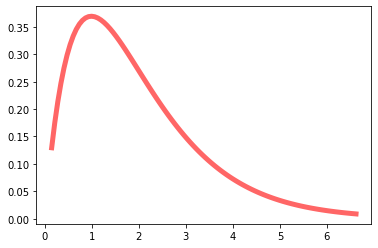

In [ ]:
x = np.linspace(distribution.ppf(0.01), distribution.ppf(0.99), 100)
plt.plot(x, distribution.pdf(x), 'r-', lw=5, alpha=0.6, label='gamma pdf')
plt.show()

### Многомерное

In [ ]:
distribution = stats.multivariate_normal(mean=[0.5, -0.2], cov=[[2.0, 0.3], [0.3, 0.5]])

In [ ]:
distribution.rvs()

array([ 2.80481641, -0.22963704])

In [ ]:
distribution.rvs(size=(2,3))

array([[[ 2.2056439 , -0.61801389],
        [-0.45650677,  0.34164738],
        [ 1.73492258, -0.2451468 ]],

       [[-1.58917356,  0.09587881],
        [ 0.04742997, -0.58976152],
        [ 0.73956832, -0.17394106]]])

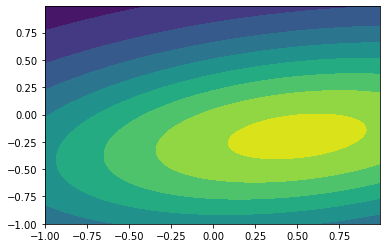

In [ ]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
plt.contourf(x, y, distribution.pdf(pos))
plt.show()

### Дискретное

In [ ]:
distribution = stats.zipf(a=2.3)
distribution.rvs(size=(2,3))

array([[2, 1, 1],
       [1, 1, 1]])

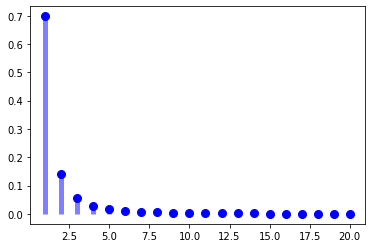

In [ ]:
x = np.arange(distribution.ppf(0.01), distribution.ppf(0.99))
plt.plot(x, distribution.pmf(x), 'bo', ms=8, label='zipf pmf')
plt.vlines(x, 0, distribution.pmf(x), colors='b', lw=5, alpha=0.5)
plt.show()

## Оценка параметров распределений

In [ ]:
array = [1, 2, 3, 4, 5]
print(min(array))
print(max(array))
print(sum(array))

1
5
15


In [ ]:
array = np.random.normal(mu, sigma, (10,))

print(st.mean(array))
print(st.stdev(array))
print(st.variance(array))

print(st.pstdev(array))
print(st.pvariance(array))

9.561691379465174
49.867422074091635
2486.759784315602
47.308390438526246
2238.0838058840413


In [ ]:
array = np.random.normal(mu, sigma, (10,3))

print(np.mean(array))
print(np.std(array))
print(np.min(array))
print(np.max(array))

28.04792876036463
41.931019063887156
-88.23493557445694
128.13566424706


In [ ]:
array = (map(abs, [-0.0, -0.1, -0.2, -0.3]))
try:
    print(np.mean(array))
except:
    print('Not today')
print(st.mean(array))

Not today
0.15


In [ ]:
array = np.random.normal(mu, sigma, (2,3))

print(array)
print(np.mean(array, axis=0))
print(np.mean(array, axis=1))

[[-19.60699987  28.98014065 120.60166492]
 [ 10.40444163 -32.80284545 116.01860476]]
[ -4.60127912  -1.9113524  118.31013484]
[43.32493524 31.20673365]


**Коэффициент асимметрии**
$$ \operatorname{Skew}[X]  = \mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]
             = \frac{\mu_3}{\sigma^3}
             = \frac{\mathbb{E}\left[(X-\mu)^3\right]}{\left( \mathbb{E}\left[ (X-\mu)^2 \right] \right )^{3/2}}$$
![Коэффициент асимметрии](fig/skew.svg)

**Коэффициент эксцесса**
$$ \operatorname{Kurt}[X] + 3= \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] = \frac{\mu_4}{\sigma^4}= \frac{\mathbb{E}\left[(X - \mu)^4\right]}{\left(\mathbb{E}\left[(X - \mu)^2\right]\right)^2} $$
![Коэффициент эксцесса](fig/kurtosis.svg)


In [ ]:
array = np.random.normal(mu, sigma, (10,2))
print(stats.skew(array)) # Коэффициент асимметрии
print(stats.kurtosis(array)) # Коэффициент эксцесса
print(stats.skew(array, axis=None))

[-0.42228058 -0.16093264]
[-1.32983222 -0.44725523]
-0.3441916428837514


In [ ]:
array = np.random.normal(mu, sigma, (2,10))
print(stats.skew(array)) # Оси по умолчанию не те!

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.51008977e-16 2.74382275e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
# Аналитическое нахождение параметров распределения
distribution = stats.norm(mu, sigma)
mean, var, skew, kurt = distribution.stats(moments='mvsk')
print(mean, var, skew, kurt)
print(distribution.std())

23.0 1764.0 0.0 0.0
42.0


## Метод максимального правдоподобия
Метод максимального правдоподобия или метод наибольшего правдоподобия (maximum likelihood estimation) — наилучшие параметры те, которые максимизируют правдоподобие (вероятность) встречи данных.

Пусть $p(x|\theta)$ — вероятность (плотность) точки $x$, а $\theta$ — параметр распределения.
Если учесть, что данные встречаются независимо, то правдоподобие массива данных: $$L(X|\theta) = \prod_{x \in X} p (x|\theta).$$

Параметр $\theta$ получается как: $$\theta = \underset{\theta}{\mathrm{argmax}} \; L(X|\theta)=\underset{\theta}{\mathrm{argmax}} \prod_{x \in X} p (x|\theta).$$

### Пример 1. Нормальное распределение
Нормальное распределение задаётся параметрами $\theta = \mu, \sigma$. Плотность в точке $x$:
$$p(x|\mu, \sigma) =\frac{1}{\sqrt{2 \pi \sigma^2 } } \exp \left ( \frac{-(x - \mu)^2}{2 \sigma^2} \right ).$$

$$\mu, \sigma = \underset{\mu, \sigma}{\mathrm{argmax}} \prod_{x \in X} \frac{1}{\sqrt{2 \pi \sigma^2 } } \exp \left ( \frac{-(x - \mu)^2}{2 \sigma^2} \right ) = \underset{\mu, \sigma}{\mathrm{argmax}} \sum_{x \in X} - \log {\sqrt{2 \pi \sigma^2 } } +   \frac{-(x - \mu)^2}{2 \sigma^2} $$

$$\frac{\partial \log (L)}{\partial \mu} = \sum_x \frac{x - \mu}{\sigma^2}=0 \Rightarrow \mu = \sum_x  \frac{x }{\left |X  \right |}= \mathbb{E}\left [ X \right ]$$

$$\frac{\partial  \log (L)}{\partial \sigma} = \sum_x -\frac{1}{\sigma}+\frac{(x-\mu)^2}{\sigma^3}=0 \Rightarrow \sigma^2 = \sum_x \frac{(x-\mu)^2}{\left |X  \right |} = Var\left [ X \right ] \Rightarrow \sigma = \sqrt {Var\left [ X \right ] }$$

### Пример 2. Равномерное распределениеие
Равномерное распределение задаётся параметрами $\theta = l, r$. Плотность в точке $x$:
$$p(x|l, r) = \left\{\begin{matrix} \frac{1}{r-l} & x \in \left [ l;r \right ]\\  0 & x \notin \left [ l;r \right ] \end{matrix}\right.$$

$$l, r = \underset{l,r}{\mathrm{argmax}} \prod_{x \in X} \left\{\begin{matrix} \frac{1}{r-l} & x \in \left [ l;r \right ]\\  0 & x \notin \left [ l;r \right ] \end{matrix}\right. = \underset{l,r}{\mathrm{argmax}} \left (\frac{1}{r-l}  \right ) ^ {\sum_x I\left [ x \in [l,r] \right ])} \cdot 0 ^ {\sum_x I\left [ x \notin [l,r] \right ])} = \\ = \underset{l,r, \forall x: x \in [l; r]}{\mathrm{argmax}} \left (\frac{1}{r-l}  \right ) ^ {\left | X \right |}= \underset{l,r, \forall x: x \in [l; r]}{\mathrm{argmax}} \left (\frac{1}{r-l}  \right )  = \underset{l \leq \min(X) , \max(X) \leq r}{\mathrm{argmax}} \left (\frac{1}{r-l}  \right )  $$

$$ \Rightarrow l = \min(X), r= \max(X)$$


### Пример 3*. Вероятностная классификация
Пусть $Y = \left \{ 1, 2, \dots, k \right \}$ — множество классов, $a_{\theta}(x) \in \left [ 0; 1 \right ] ^ k$ — вероятностное предсказание $\theta$ параметризованного алгоритма мягкой классификации $a$ для входа $x$, тогда найти параметры $\theta$ для набора данных $D$ можно методом максимального правдоподобия: $$\theta = \underset{\theta}{\mathrm{argmax}} \; L(D|\theta)=\underset{\theta}{\mathrm{argmax}} \prod_{(x,y) \in D} (a_{\theta}(x))_y=\underset{\theta}{\mathrm{argmax}} \sum_{(x,y) \in D} \log ((a_{\theta}(x))_y)$$
$$\log ((a_{\theta}(x))_y) = \left \langle  \mathrm{onehot}(y), \log (a_{\theta}(x)) \right \rangle  = \sum_{i=1}^k (\mathrm{onehot}(y))_i \cdot \log ((a_{\theta}(x))_i)=\mathrm{CrossEntropy}\left ( \mathrm{onehot}(y), a_{\theta}(x) \right )$$

In [ ]:
array = np.random.normal(mu, sigma, 1000)
print(stats.norm.fit(array))

(22.14331617353396, 42.18273042424882)


## Статистическая значимость
P-value, p-уровень значимости, p-критерий — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

Проблема массовых сравнений:
* http://tylervigen.com/spurious-correlations
* https://xkcd.com/882/

### Доверительный интервал

$$\Delta  = t_\alpha(n-1)\cdot\frac{S}{\sqrt{n}}, \; S = \sqrt{\frac{\sum_i (x_i-M)^2}{n-1}}, \; M = \frac{\sum_i x_i}{n}$$
![Таблица](fig/table.png)

In [ ]:
def confidence_interval(data, alpha=0.95):
    l, r = stats.t.interval(alpha=alpha, df=len(data)-1, loc=st.mean(data), scale=stats.sem(data))
    m = (l + r) / 2
    e = r - m
    return m, e 

for _ in range(100):
    data = np.random.normal(100, 20, 200)
    m, e = confidence_interval(data, 0.95)
    if (100 < m - e or m + e < 100):
        print(m, e)

102.91531600761735 2.775314404089414
97.3031433683862 2.591834294529775
96.29330167166879 2.7710278904760486
97.17667400799961 2.63425452551958
103.37723963561605 2.814409849096151
96.94146808538639 2.9471641038319945
97.14879506277198 2.7138237865710693


In [ ]:
data = np.random.normal(100, 20, 200)
m, e = confidence_interval(data)
print(m, '±', e)

100.25165837351364 ± 2.877373824932377


## Визуализация распределений

In [ ]:
# Пример: измерение случайной величины (качество алгоритма)
def alg(q=1, i=1):
    return q + rnd.gauss(math.sqrt(i), 1)

### Отклонение

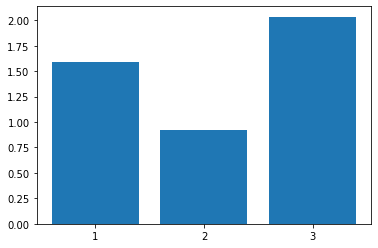

In [ ]:
n = 5
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.6) for _ in range(n)]

m1, e1 = confidence_interval(alg1)
m2, e2 = confidence_interval(alg2)
m3, e3 = confidence_interval(alg3)

plt.bar(['1', '2', '3'], [m1, m2, m3])
plt.show()

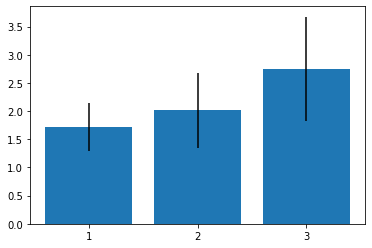

In [ ]:
n = 10
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.9) for _ in range(n)]

m1, e1 = confidence_interval(alg1)
m2, e2 = confidence_interval(alg2)
m3, e3 = confidence_interval(alg3)

plt.bar(['1', '2', '3'], [m1, m2, m3], yerr=[e1, e2, e3])
plt.show()

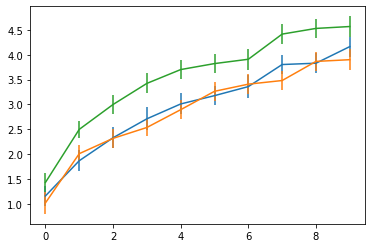

In [ ]:
q = [1.0, 1.0, 1.6]

k = len(q) # число алгоритмов
n = 100     # число повторов
m = 10     # число измерений

results = [[[alg(q[i], t) for _ in range(n)] for t in range(m)] for i in range(k)]

x = range(m)
y = [[confidence_interval(results[i][t])[0] for t in range(m)] for i in range(k)]
e = [[confidence_interval(results[i][t])[1] for t in range(m)] for i in range(k)]

for i in range(k):
    plt.errorbar(x, y[i], e[i])
plt.show()

### Ящик с усами и Скрипка

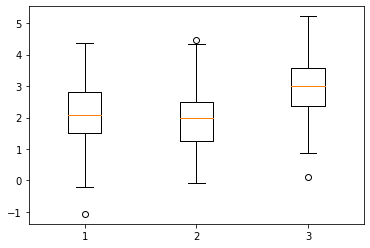

In [ ]:
n = 100
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.9) for _ in range(n)]

plt.boxplot([alg1, alg2, alg3])
plt.show()

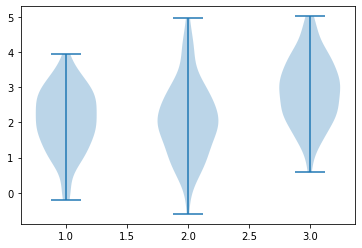

In [ ]:
n = 100
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.9) for _ in range(n)]

plt.violinplot([alg1, alg2, alg3])
plt.show()

### Гистограмма

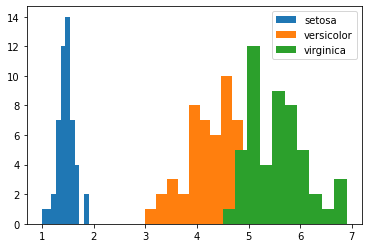

In [ ]:
for name, data in iris.groupby(['species']):
    values = data['petal_length'].values
    plt.hist(values, label=name)
plt.legend()
plt.show()

### Непараметрическое восстановление плотности (ядерное сглаживание)
$$\hat{f}_h(x)=\frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big),$$
где $K$ — ядро сглаживания, $h$ — ширина окна сглаживания, $n$ — число точек.
![Ядра](fig/kde.png)

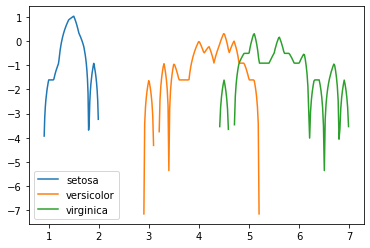

In [ ]:
# Варианты ядер: 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'
from sklearn.neighbors import KernelDensity
for name, data in iris.groupby(['species']):
    values = data['petal_length'].values
    train = np.reshape(values, (-1, 1))   
    kde = sklearn.neighbors.KernelDensity(kernel='linear', bandwidth=0.1).fit(train)
    x = np.linspace(min(values)-1, max(values)+1, num=256).reshape((-1, 1))
    y = kde.score_samples(x)
    plt.plot(x, y, label=name)
plt.legend()
plt.show()


## Статистические тесты

### Тест на нормальность

In [ ]:
def mll_test(array):
    mu, sigma = stats.norm.fit(array)    
    distribution = stats.norm(loc=mu, scale=sigma)
    return st.mean(map(distribution.logpdf, array))
    
print(mll_test(np.random.normal(0, 1, 40)))
print(mll_test(np.random.uniform(0, 1, 40)))

-1.4504576732051762
-0.2563267023475122


In [ ]:
print(stats.normaltest(np.random.normal(0, 1, 40)))
print(stats.normaltest(np.random.uniform(0, 1, 40)))

NormaltestResult(statistic=1.6835984877652368, pvalue=0.430934469275441)
NormaltestResult(statistic=6.5476157967115975, pvalue=0.037861977662888825)


### t-критерий Стьюдента

In [ ]:
print(stats.ttest_1samp(np.random.normal(0, 1, 40), 0))
print(stats.ttest_1samp(np.random.normal(0, 1, 40), 2))

Ttest_1sampResult(statistic=-2.1242206249654787, pvalue=0.040046258721379464)
Ttest_1sampResult(statistic=-11.980284189743962, pvalue=1.2102014397504873e-14)


#### Парные тесты

In [ ]:
n = 100
alg1 = [alg(1.0, i) for i in range(n)]
alg2 = [alg(1.0, i) for i in range(n)]
alg3 = [alg(1.6, i) for i in range(n)]

print(stats.ttest_rel(alg1, alg2))
print(stats.ttest_rel(alg1, alg3))

Ttest_relResult(statistic=-1.6100417546693295, pvalue=0.1105728524662377)
Ttest_relResult(statistic=-4.233332243757266, pvalue=5.156341639408049e-05)


In [ ]:
n = 100
alg1 = [alg(1.0, i) for i in range(n)]
alg2 = [alg(1.0, i) for i in range(n)]
alg3 = [alg(1.6, i) for i in range(n)]

print(stats.wilcoxon(alg1, alg2))
print(stats.wilcoxon(alg1, alg3))

WilcoxonResult(statistic=2379.0, pvalue=0.615670737630266)
WilcoxonResult(statistic=1359.0, pvalue=6.0954018307393815e-05)


#### Непарные тесты
$$t = \frac{M_1 - M_2}{\sqrt{\frac{S^2}{n_1}+\frac{S^2}{n_2}}}, \; S^2 = \frac{\sum_j(x_{1,j}-M_1)^2+\sum_j(x_{2,j}-M_2)^2}{n_1+n_2-2}, \; M_i = \sum _{j=1}^{n_{i}} \frac{x_{i,j}}{n_i}$$

In [ ]:
n = 10
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.6) for _ in range(n)]

print(stats.ttest_ind(alg1, alg2))
print(stats.ttest_ind(alg1, alg3))

Ttest_indResult(statistic=-1.0390768585398458, pvalue=0.31252623642329996)
Ttest_indResult(statistic=-2.035211863622767, pvalue=0.05682675559060029)


In [ ]:
alg1 = np.random.normal(0, 1, 10)
alg2 = np.random.normal(0, 9, 10)

print(stats.ttest_ind(alg1, alg2))
print(stats.ttest_ind(alg1, alg2, equal_var=True))
print(stats.ttest_ind(alg1, alg2, equal_var=False)) # Welch’s t-test

Ttest_indResult(statistic=0.7518827677726299, pvalue=0.46184071943216276)
Ttest_indResult(statistic=0.7518827677726299, pvalue=0.46184071943216276)
Ttest_indResult(statistic=0.75188276777263, pvalue=0.47102499369032547)


In [ ]:
n = 10
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.6) for _ in range(n)]

print(stats.ranksums(alg1, alg2))
print(stats.ranksums(alg1, alg3))

RanksumsResult(statistic=0.30237157840738177, pvalue=0.7623688184698398)
RanksumsResult(statistic=-2.418972627259054, pvalue=0.015564411386633814)


### Дисперсионный анализ
ANOVA (ANalysis Of VAriance)

Пусть $n$ — суммарное число объектов во всех группах, $n_i$ — число объектов в группе $i$, $k$ — число групп, $x_{i,j}$ — значение объекта $j$ в группе $i$.

Соотношение межгрупповой и внутригрупповой дисперсий : $F = \frac{MS_{bg}}{MS_{wg}}$

Дисперсии: $MS_{t} = \frac{SS_{t}}{n-1}$, $MS_{bg} = \frac{SS_{bg}}{k-1}$, $MS_{bg} = \frac{SS_{wg}}{n-k}$

Сумма квадратов отклонений от среднего: $SS_t = SS_{wg} + SS_{bg}$

${SS_{{t}}=\sum _{i=1}^{k}\sum _{j=1}^{n_{i}}(x_{i,j}-M)^{2}}$,
${SS_{{bg}}=\sum _{i=1}^{k}(M_{i}-M)^{2}}$,
${SS_{{wg}}=\sum _{i=1}^{k}\sum _{j=1}^{n_{i}}(x_{i,j}-M_{i})^{2}}$

Среднее: $M_i = \sum _{j=1}^{n_{i}} \frac{x_{i,j}}{n_i}$, 
$M= \sum _{i=1}^{k} \sum _{j=1}^{n_{i}} \frac{x_{i,j}}{n}$

In [ ]:
n = 100
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.9) for _ in range(n)]

print(stats.f_oneway(alg1, alg2))
print(stats.f_oneway(alg1, alg2, alg3))
print(stats.f_oneway(alg2, alg3))

F_onewayResult(statistic=0.003719912358390747, pvalue=0.9514278285821776)
F_onewayResult(statistic=16.191755074515182, pvalue=2.116447474521496e-07)
F_onewayResult(statistic=26.14724407683845, pvalue=7.439249316216125e-07)


In [ ]:
n = 100
alg1 = [alg(1.0) for _ in range(n)]
alg2 = [alg(1.0) for _ in range(n)]
alg3 = [alg(1.9) for _ in range(n)]

print(stats.kruskal(alg1, alg2))
print(stats.kruskal(alg1, alg2, alg3))
print(stats.kruskal(alg2, alg3))

KruskalResult(statistic=0.7271701492537659, pvalue=0.3938019939414007)
KruskalResult(statistic=71.50390431893686, pvalue=2.9725177721951644e-16)
KruskalResult(statistic=47.37605373134318, pvalue=5.859412402796907e-12)


KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)


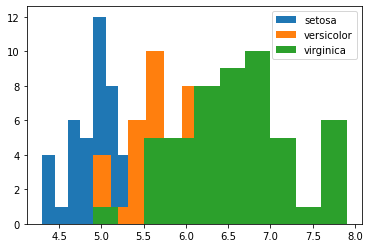

In [ ]:
column = 'petal_length'
column = 'sepal_length'
values = []
for name, data in iris.groupby(['species']):
    values.append(data[column].values)
print(stats.kruskal(*values))

for name, data in iris.groupby(['species']):
    values = data[column].values
    plt.hist(values, label=name)
plt.legend()
plt.show()

### Категориальные тесты

#### Энтропия
$$H(p) = - \sum_i p_i \cdot \log(p_i)$$
$$H(p,q) = - \sum_i p_i \cdot \log(q_i)$$
$$KL(P||Q) = H(p,q) - H(p) = - \sum_i p_i \cdot \log(q_i) + \sum_i p_i \cdot \log(p_i) = \sum_i p_i \cdot \log\left ( \frac{p_i}{q_i} \right )$$
$$IG(P,Q) = H(P) - H(P|Q)$$

In [ ]:
print(stats.entropy([0.5, 0.5]))
print(stats.entropy([0.5, 0.5], qk=[0.1, 0.9])) # Расстояние Кульбака — Лейблера

0.6931471805599453
0.5108256237659907


#### Коэффициент Джини
$$GI(P) = 1 - \sum_i p_i^2$$

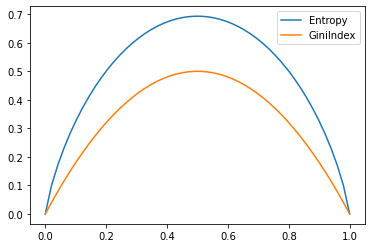

In [ ]:
p = np.linspace(0.00001, 0.99999)
q = 1 - p
h = -(p * np.log(p) + q * np.log(q))
g = 1 - p*p - q*q
plt.plot(p, h, label="Entropy")
plt.plot(p, g, label="GiniIndex")
plt.legend()
plt.show()

#### Хи-квадрат
$$\chi^2 = \frac{(expected_i - observed_i)^2}{expected_i}$$

In [ ]:
print(stats.chisquare([16, 18, 16, 14, 12, 12]))
print(stats.chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8]))
print(stats.chisquare([45, 55]))

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)
Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)
Power_divergenceResult(statistic=1.0, pvalue=0.31731050786291115)


### Корреляция

#### Корреляция Пирсона (линейная)
$$\mathrm{corr}(X,Y) = \frac{\mathrm{cov}(X,Y)}{{\sigma}_{X}{\sigma}_{Y}}= \frac{\sum_i (x_i-\bar{X})(y_i-\bar{Y})}{\sqrt{\sum_i (x_i-\bar{X})^2\sum_i (y_i-\bar{Y})^2}}$$

In [ ]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(stats.linregress(x, y))
print(stats.pearsonr(x, y))

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913, intercept_stderr=33.37538930964323)
(0.758640289091187, 0.010964341301680813)


In [ ]:
h = np.arange(100)
x = np.sin(h)
y = np.cos(h)
print(stats.pearsonr(x, y))

(0.006042959293630655, 0.9524181634080802)


![Same stats, different graphs](fig/same_stats.png)
<sub>Matejka J., Fitzmaurice G. Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing // Proceedings of the 2017 CHI conference on human factors in computing systems. 2017. С. 1290–1294.</sub>

![Корреляция](fig/corr.webp)

#### Ранговая корреляция

Коэффициент ранговой корреляции Спирмена: $1 - \sum_i \frac{6 \cdot d_i}{n^3 - n}$, где $d_i$ — разница между позициями $i$ элемента при сортировки по $x$ и $y$.

Коэффициент корреляции Кенделла:  $\sum_{i<j}\frac{\mathrm{sign}(x_i - x_j) \cdot \mathrm{sign}(y_i - y_j)}{n (n-1)/2}$.

In [ ]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(stats.spearmanr(x, y))
print(stats.kendalltau(x, y))

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)
KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)


In [ ]:
h = np.arange(10)
x = np.sin(h)
y = np.cos(h)

print(stats.spearmanr(x, y))
print(stats.kendalltau(x, y))

SpearmanrResult(correlation=-0.10303030303030303, pvalue=0.7769984634438898)
KendalltauResult(correlation=-0.06666666666666667, pvalue=0.8618005952380953)


#### Реализация в numpy

In [ ]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
print(np.corrcoef(xyz))
print(np.corrcoef(x,y))

[[ 1.          0.75864029 -0.96807242]
 [ 0.75864029  1.         -0.83407922]
 [-0.96807242 -0.83407922  1.        ]]
[[ 1.         -0.04515193]
 [-0.04515193  1.        ]]


#### Реализация в Pandas

In [ ]:
pl = iris['petal_length']
sl = iris['sepal_length']
pl.corr(sl)

0.871754157304871

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.159457,0.881386,0.834421
sepal_width,-0.159457,1.000000,-0.303421,-0.277511
petal_length,0.881386,-0.303421,1.000000,0.936003
petal_width,0.834421,-0.277511,0.936003,1.000000


In [ ]:
iris.corr(method='kendall')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.072112,0.717624,0.654960
sepal_width,-0.072112,1.000000,-0.182391,-0.146988
petal_length,0.717624,-0.182391,1.000000,0.803014
petal_width,0.654960,-0.146988,0.803014,1.000000
